# Phase Estimation Algorithm

In [1]:
import numpy as np
import qiskit as qi
import qiskit.quantum_info as quantu_info
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, execute
import math
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [2]:
def unitary1(control_qubit,t):
    qpe1.cz(control_qubit,t)
    qpe1.cs(control_qubit,t+1)

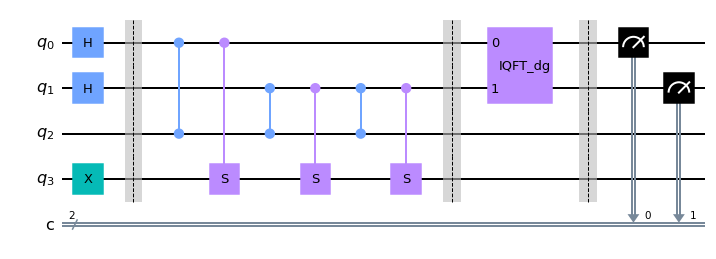

In [3]:
t = 2

qpe1 = QuantumCircuit(t+2,t)
qpe1.x(t+1)

for i in range(t):
    qpe1.h(i)
qpe1.barrier()

repeats = 1
for control_qubit in range(t):
    for i in range(repeats):
        unitary1(control_qubit,t)
    repeats *= 2
qpe1.barrier()

qpe1 = qpe1.compose(QFT(t, inverse=True), np.linspace(0,t-1,t,dtype=int))

qpe1.barrier()
for n in range(t):
    qpe1.measure(n,n)

qpe1.draw('mpl')

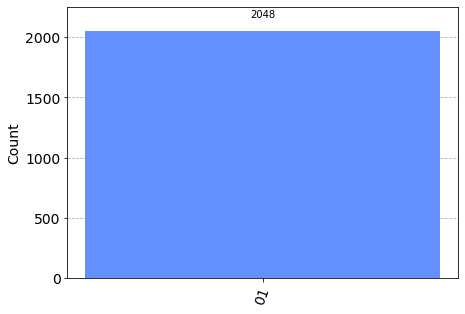

In [18]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe1, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Probability for measurement of correct eigenvalue is 1

In [19]:
def unitary2(control_qubit,t):
    qpe2.cz(control_qubit,t)
    qpe2.cs(control_qubit,t+1)

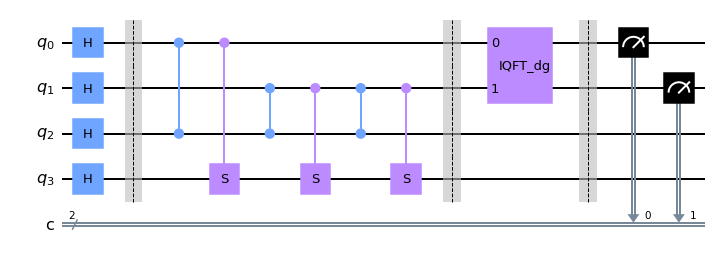

In [20]:
t = 2
#initializing the circuit and the state
qpe2 = QuantumCircuit(t+2,t)
qpe2.h(t)
qpe2.h(t+1)

for i in range(t):
    qpe2.h(i)
qpe2.barrier()

repeats = 1
for control_qubit in range(t):
    for i in range(repeats):
        unitary2(control_qubit,t)
    repeats *= 2
qpe2.barrier()

qpe2 = qpe2.compose(QFT(t, inverse=True), np.linspace(0,t-1,t,dtype=int))

qpe2.barrier()
for n in range(t):
    qpe2.measure(n,n)

qpe2.draw('mpl')

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe2, aer_sim)
result = aer_sim.run(t_qpe, shots=shots).result()
results = result.get_counts()
display(results)


{'01': 514, '10': 533, '00': 501, '11': 500}

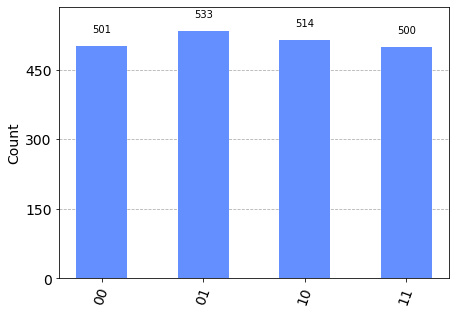

In [22]:
NQ_odering = {}
for q0 in range(2):
    for q1 in range(2):
            myin = str(q1) + str(q0)
            myout = str(q0) + str(q1)
            age = results.get(myin)
            if age:
                NQ_odering[myout] = results[myin]
            else:
                results[myin] = 0
                NQ_odering[myout] = results[myin]
plot_histogram(NQ_odering)
#plot_histogram(answer)

In [23]:
def unitary3(control_qubit,t):
    qpe3.cz(control_qubit,t)
    qpe3.cs(control_qubit,t+1)

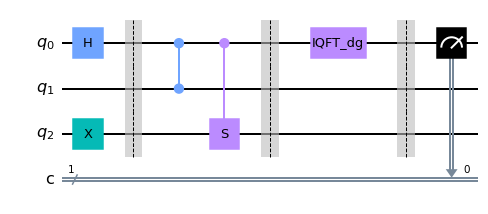

In [24]:
t = 1
#initializing the circuit and the state
qpe3 = QuantumCircuit(t+2,t)
qpe3.x(t+1)

for i in range(t):
    qpe3.h(i)
qpe3.barrier()

repeats = 1
for control_qubit in range(t):
    for i in range(repeats):
        unitary3(control_qubit,t)
    repeats *= 2
qpe3.barrier()

qpe3 = qpe3.compose(QFT(t, inverse=True), np.linspace(0,t-1,t,dtype=int))

qpe3.barrier()
for n in range(t):
    qpe3.measure(n,n)

qpe3.draw('mpl')

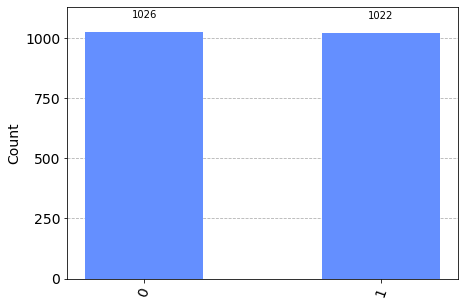

In [25]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe3, aer_sim)
result = aer_sim.run(t_qpe, shots=shots).result()
results = result.get_counts()
plot_histogram(results)